In [1]:
from reinforcement_training import *
from notebook_game_helper import *

Using Theano backend.


In [2]:
# lets train a DQN model!
# make the model
hiddens = [{"size":100,"activation":"relu"},
           {"size":100,"activation":"relu"},
           {"size":100,"activation":"relu"},
          {"size":100,"activation":"relu"}]
# make an optimizer
from keras.optimizers import sgd, RMSprop, Adagrad, Adadelta, Adam
# note to self: DON'T CHANGE THIS UNTIL YOU KNOW WE'RE LEARNING SOMETHING
# optimizer = sgd(lr = 0.0001)
# optimizer_str = "SGD"
# optimizer = Adagrad()
# optimizer_str = "Adagrad"
# optimizer = RMSprop()
# optimizer_str = "RMSprop"
# optimizer = Adadelta()
# optimizer_str = "Adadelta"
optimizer = Adam()
optimizer_str = "Adam"
model = baseline_model(optimizer, hiddens)

In [3]:
# prepare the game for validating model
test_game_size = 9
test_game = ReinforcementNaviGame(test_game_size, test_game_size, model)
test_game.setup()
test_game.Navigator.move(x=1, y=0, relative = False)

In [4]:
# test_game.add_wall(start=(7,7), length=3, step=(-1,1))

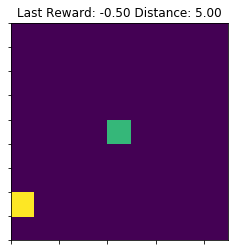

None

In [5]:
# test_game.shift_goal()
# test_game.Navigator.move(x=0, y=0, relative = False)
animate_game(test_game, n = 10)

In [ ]:
# prepare the game for training model
training_game_size = test_game_size
training_game = ReinforcementNaviGame(training_game_size,
                                training_game_size,
                                model,
                                tolerance = 1.3,
                                goal_idle = 2)
training_game.setup()

In [ ]:
training_episodes = 1000000
steps = 10
# train the model
output = train_model(game = training_game,
                model = model,
                episodes = training_episodes,
                steps = steps)

Episode 194221, Replay Loss: 0.482:  19%|█▉        | 194222/1000000 [7:55:42<32:40:19,  6.85it/s]   

In [ ]:
# plot learning info
title_str = str(training_game_size) + "x" + str(training_game_size) + " with " 
title_str += str(training_episodes) + " episodes, " + str(steps) + " steps per episode, & "
title_str += str(len(hiddens)) + " hidden layers, optimized with " + optimizer_str + "\n"
f, axarr = pl.subplots(3, 1, figsize = (10, 15), dpi = 300)
# f.canvas.set_window_title("RL Loss, 100 eps w/ 50 steps, Look: 20")
mean_step = 10
num_means = int(len(output['distances'])/mean_step/steps)

for _, k in enumerate([1000, 10000, 100000]):
    mean_step = k
    mean_rewards = []
    mean_dists = []
    mean_loss = []
    num_means = int(len(output['distances'])/mean_step/steps)
    steps_per_mean = steps*mean_step
    x = np.linspace(0, training_episodes, num_means)
    for i in range(num_means):
        mean_r = 0
        mean_d = 0
        mean_l = 0
        for j in range(steps_per_mean):
            mean_r += output['rewards'][j + i * steps_per_mean]
            mean_d += output['distances'][j + i * steps_per_mean]
            mean_l += output['loss'][j + i * steps_per_mean]
        mean_r = mean_r / steps_per_mean
        mean_d = mean_d / steps_per_mean
        mean_l = mean_l / steps_per_mean
        mean_rewards.append(mean_r)
        mean_dists.append(mean_d)
        mean_loss.append(mean_l)
    label = str(mean_step) + " Episodes"
    axarr[0].plot(x, mean_loss, label = label)
    axarr[1].plot(x, mean_dists, label = label)
    axarr[2].plot(x, mean_rewards, label = label)

axarr[0].grid(True)
axarr[0].set_title(title_str + 'Mean Loss') 
axarr[1].grid(True)
axarr[1].set_title('Mean Distances from Goal')
axarr[2].grid(True)
axarr[2].set_title('Mean Rewards')
f.subplots_adjust(hspace=0.2)

# axarr[1].plot(x, output['replays'])
# axarr[1].set_title('Replay Loss')
# axarr[2].plot(x2, output['reward_totals'])
# axarr[2].set_title('Total Reward')
# axarr[2].plot(x2, output['distances'])
# axarr[2].set_title('Distance from Goal')

file_str = str(training_game_size) + "x" + str(training_game_size) + "_" 
file_str += str(training_episodes) + "_" + str(steps) + "_" + str(len(hiddens))
file_str += "_" + optimizer_str
pl.legend()
pl.plot()
pl.savefig("rl_plots" + "_with_replay_50_neurons_per_later" + file_str + ".png")
pl.show()

In [ ]:
import pickle
pickle.dump( model, open( "NaviGame_0.pkl", "wb" ) )